Esta análise foi solicitada por um grande distribuidor de vinhos, localizado no estado do Rio de janeiro, e que desejaria adquirir os melhores vinhos tintos, da região norte de Portugal. Este distribuidor, de forma minuciosa, deseja saber quais caracteristicas fisica-quimica se aproxima os vinhos de melhor Qualidade , para se manter em maior quantidade em seu estoque, de modo que somente ele teria os melhores vinhos em sua pratileira e venderia somente para os entendidos desta bebida a um preço acima do mercado
Apos diversas viagens a região de portugal, adquirimos atraves da associação dos fabricantes local o Datasets dos 1599 diferentes vinhos fabricado nesta região.
Identificvamos que as tarefas associadas a este datasets são: Classificação e regressão. o que nos leva a concluir que se trata de um aprendizado supervisionado

In [8]:
# Importação do pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Caminho de leitura do Datasets

Qldvinhos= pd.read_csv(r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

In [ ]:
labels_atributos = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality']

In [ ]:
# Verificando que Qldvinhos 'um dataframe

type(Qldvinhos)

pandas.core.frame.DataFrame

In [10]:
# Exibindo as 5 primeiras linhas do datasets

Qldvinhos.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
# Exibindo oas 5 ultimas linhasdo datasets

Qldvinhos.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [12]:
# Exibindo o nome das colunas

Qldvinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
#Exibindo as dimensões do Datasets

Qldvinhos.shape

(1599, 12)

In [14]:
# Exibindo a quantidade de linhas por coluna

Qldvinhos.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
# Exibindo Sumário estatistico

Qldvinhos.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Ordenando o dataframe por uma coluna, da maior qualidade para a menor.

Qldvinhos.sort_values(by='quality', ascending=False)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
495            10.7             0.350         0.53            2.60      0.070   
1403            7.2             0.330         0.33            1.70      0.061   
390             5.6             0.850         0.05            1.40      0.045   
1061            9.1             0.400         0.50            1.80      0.071   
1202            8.6             0.420         0.39            1.80      0.068   
...             ...               ...          ...             ...        ...   
690             7.4             1.185         0.00            4.25      0.097   
1478            7.1             0.875         0.05            5.70      0.082   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
832            10.4             0.440         0.42            1.50      0.145   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
495                   5.0                  16.0  0.99720  3.15       0.65   
1403                  3.0                  13.0  0.99600  3.23       1.10   
390                  12.0                  88.0  0.99240  3.56       0.82   
1061                  7.0                  16.0  0.99462  3.21       0.69   
1202                  6.0                  12.0  0.99516  3.35       0.69   
...                   ...                   ...      ...   ...        ...   
690                   5.0                  14.0  0.99660  3.63       0.54   
1478                  3.0                  14.0  0.99808  3.40       0.52   
899                   6.0                  11.0  0.99892  3.48       0.49   
1299                  5.0                   9.0  0.99476  3.50       0.40   
832                  34.0                  48.0  0.99832  3.38       0.86   

      alcohol  quality  
495      11.0        8  
1403     10.0        8  
390      12.9        8  
1061     12.5        8  
1202     11.7        8  
...       ...      ...  
690      10.7        3  
1478     10.2        3  
899      11.0        3  
1299     10.9        3  
832       9.9        3  

[1599 rows x 12 columns]

In [ ]:
# Selecionando uma coluna especifica

Qldvinhos['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Tabela com os vinhos de melhores Qualidade. Totalizando apenas 18 linhas das 1599 existentes em nossa Datasets

In [20]:
Qldvinhos[Qldvinhos['quality'] > 7]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7               7.3              0.65         0.00             1.2      0.065   
8               7.8              0.58         0.02             2.0      0.073   
16              8.5              0.28         0.56             1.8      0.092   
37              8.1              0.38         0.28             2.1      0.066   
62              7.5              0.52         0.16             1.9      0.085   
...             ...               ...          ...             ...        ...   
1541            7.4              0.25         0.29             2.2      0.054   
1544            8.4              0.37         0.43             2.3      0.063   
1549            7.4              0.36         0.30             1.8      0.074   
1555            7.0              0.56         0.17             1.7      0.065   
1584            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                    15.0                  21.0  0.99460  3.39       0.47   
8                     9.0                  18.0  0.99680  3.36       0.57   
16                   35.0                 103.0  0.99690  3.30       0.75   
37                   13.0                  30.0  0.99680  3.23       0.73   
62                   12.0                  35.0  0.99680  3.38       0.62   
...                   ...                   ...      ...   ...        ...   
1541                 19.0                  49.0  0.99666  3.40       0.76   
1544                 12.0                  19.0  0.99550  3.17       0.81   
1549                 17.0                  24.0  0.99419  3.24       0.70   
1555                 15.0                  24.0  0.99514  3.44       0.68   
1584                 24.0                  34.0  0.99484  3.29       0.80   

      alcohol  quality  
7       10.00        7  
8        9.50        7  
16      10.50        7  
37       9.70        7  
62       9.50        7  
...       ...      ...  
1541    10.90        7  
1544    11.20        7  
1549    11.40        8  
1555    10.55        7  
1584    11.60        7  

[217 rows x 12 columns]

Serão apresentados uma sequencia de 11 graficos, onde será declarado o cruzamento das variaveis fisica-quimica. O Objetivo e analisar o comportamento de cada variavel, levando em consideração os 18 vinhos de melhor qualidade ( pontuados acima de 7 ) 

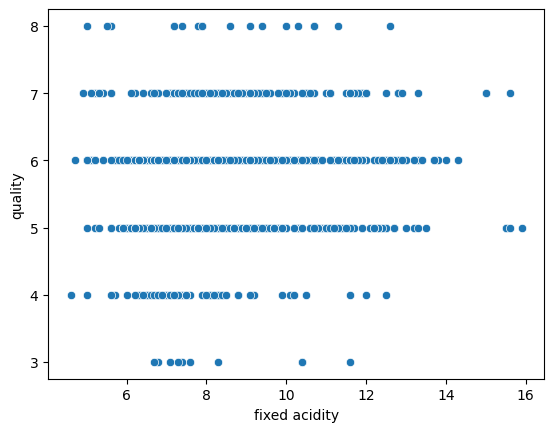

In [ ]:
# Acidez Fixa X Qualidade

sns.scatterplot(x= 'fixed acidity', y= 'quality', data= Qldvinhos);

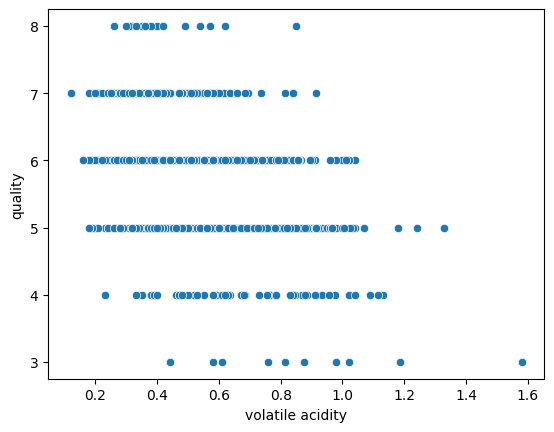

In [ ]:
# Acidez Volátil X Qualidade

sns.scatterplot(x= 'volatile acidity', y= 'quality', data= Qldvinhos);

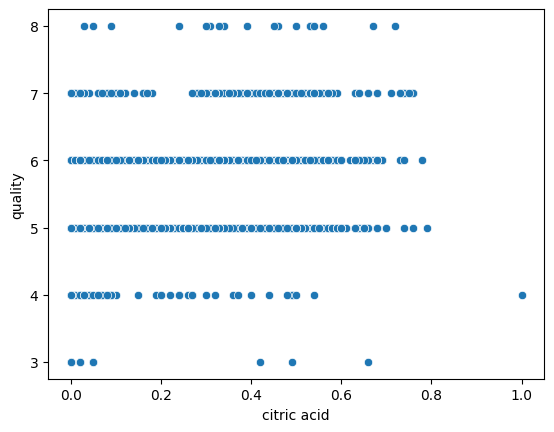

In [ ]:
# Acido Citríco X Qualidade

sns.scatterplot(x= 'citric acid', y= 'quality', data= Qldvinhos);


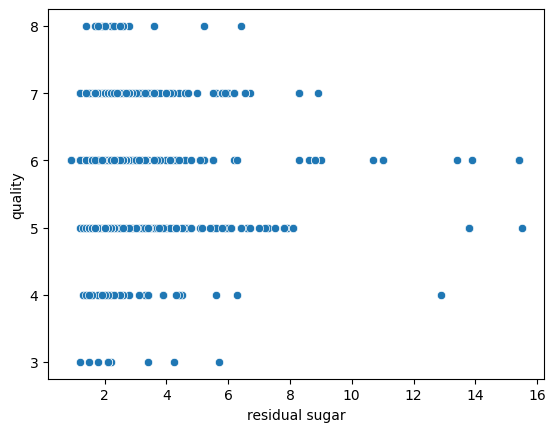

In [17]:
# Açucar Residual X Qualidade

sns.scatterplot(x= 'residual sugar', y= 'quality', data= Qldvinhos);


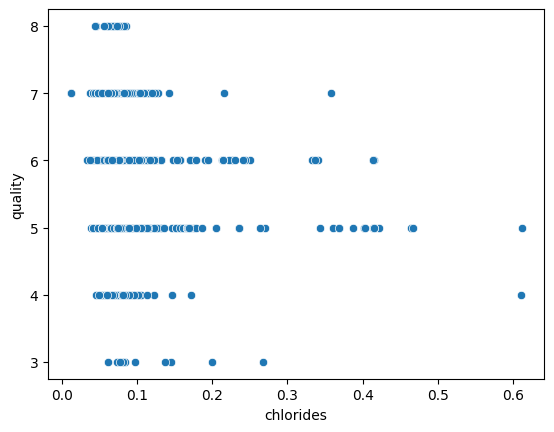

In [ ]:
# Cloreto X Qualidade

sns.scatterplot(x= 'chlorides', y= 'quality', data= Qldvinhos);

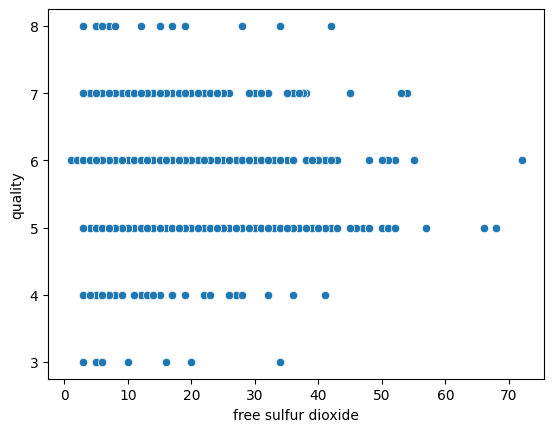

In [ ]:
# Dioxido de Enxofre livre X Qualidade

sns.scatterplot(x= 'free sulfur dioxide', y= 'quality', data= Qldvinhos);

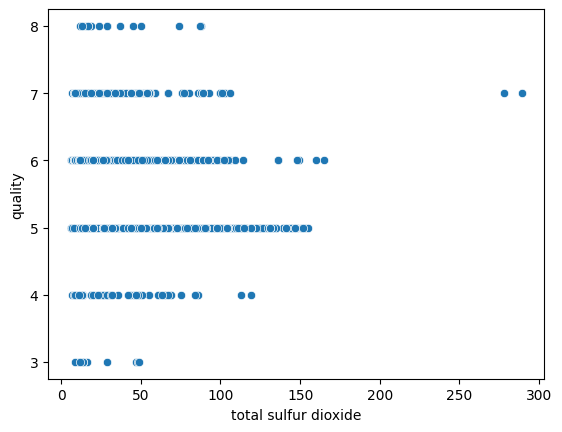

In [ ]:
# Dioxido de Enxofre Total X Qualidade

sns.scatterplot(x= 'total sulfur dioxide', y= 'quality', data= Qldvinhos);

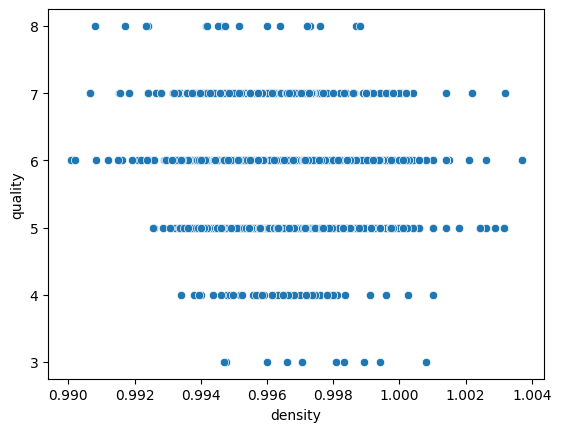

In [ ]:
# Densidade X Qualidade

sns.scatterplot(x= 'density', y= 'quality', data= Qldvinhos);

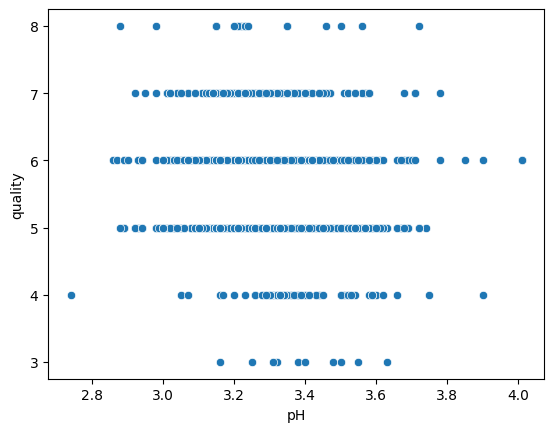

In [ ]:
# pH X Qualidade

sns.scatterplot(x= 'pH', y= 'quality', data= Qldvinhos);

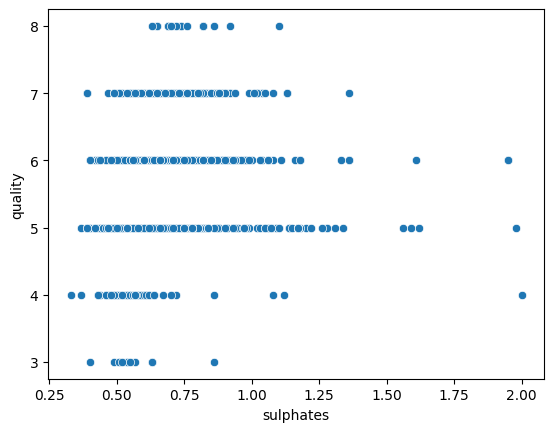

In [ ]:
# Sulfato X Qualidade

sns.scatterplot(x= 'sulphates', y= 'quality', data= Qldvinhos);

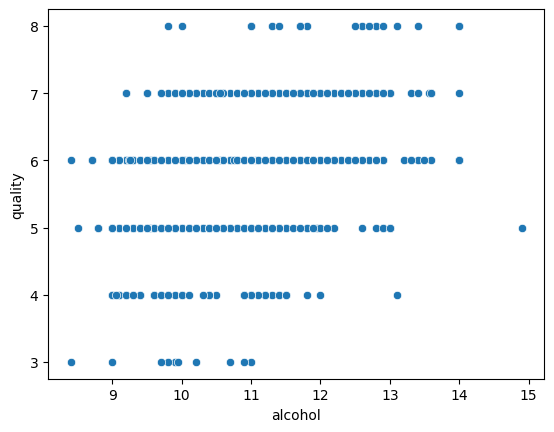

In [ ]:
# Acool X Qualidade

sns.scatterplot(x= 'alcohol', y= 'quality', data= Qldvinhos);

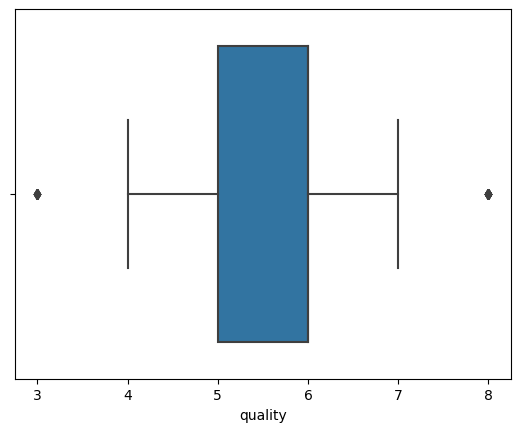

In [ ]:
# Boxplot da Qualidade do vinho
sns.boxplot(x= Qldvinhos['quality']);

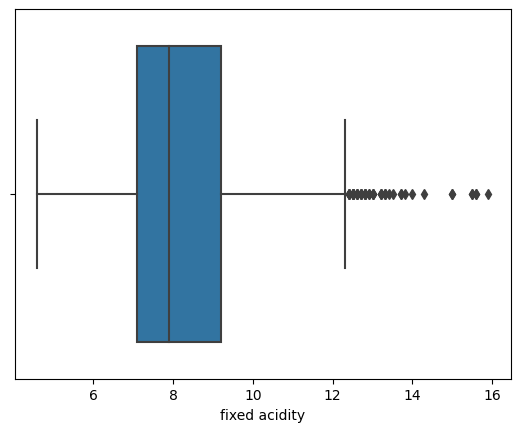

In [ ]:
# Boxplot da Acidez Fixa
sns.boxplot(x= Qldvinhos['fixed acidity']);

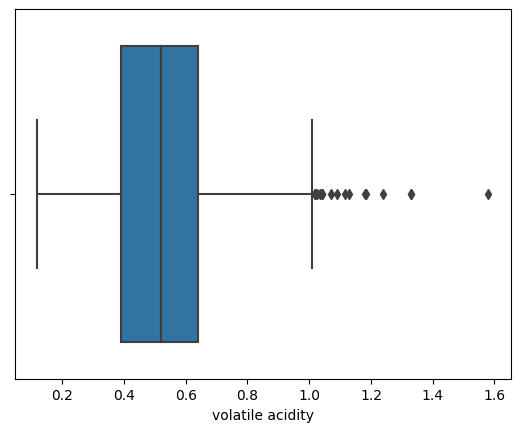

In [ ]:
# Boxplot da Acidez Volátil
sns.boxplot(x= Qldvinhos['volatile acidity']);

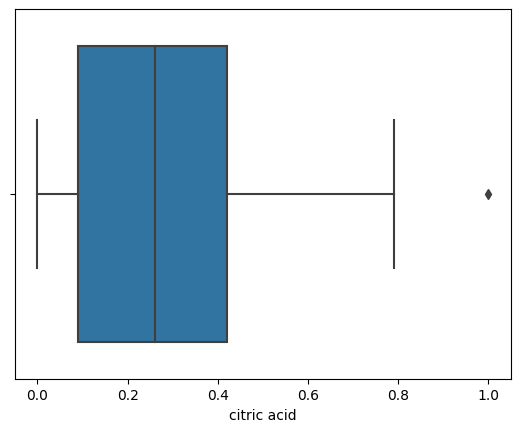

In [ ]:
# Boxplot da Acidez Citríco
sns.boxplot(x= Qldvinhos['citric acid']);

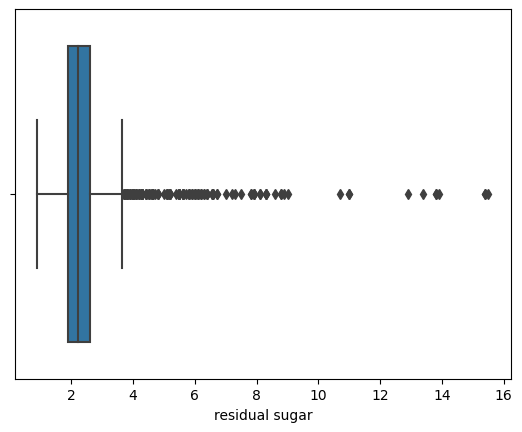

In [ ]:
# Boxplot da Açucar Residual
sns.boxplot(x= Qldvinhos['residual sugar']);

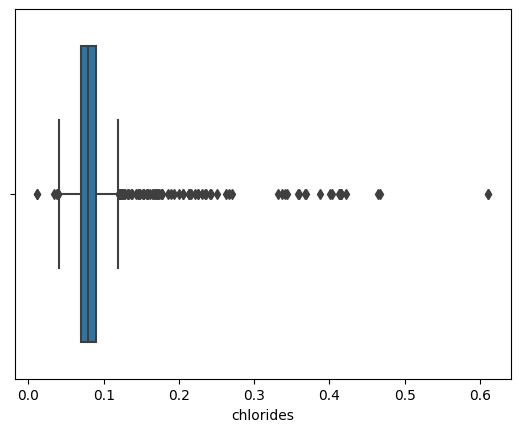

In [ ]:
# Boxplot Cloreto
sns.boxplot(x= Qldvinhos['chlorides']);

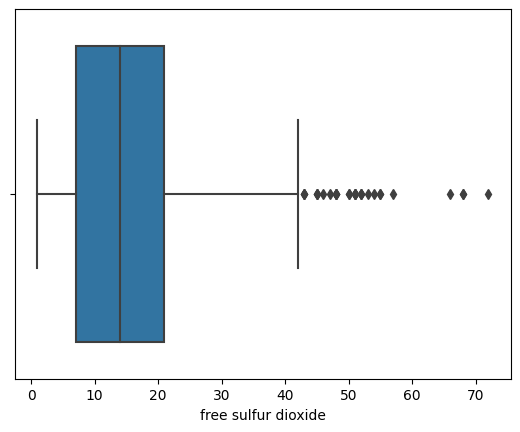

In [ ]:
# Boxplot Dioxido de Enxofre Livre
sns.boxplot(x= Qldvinhos['free sulfur dioxide']);

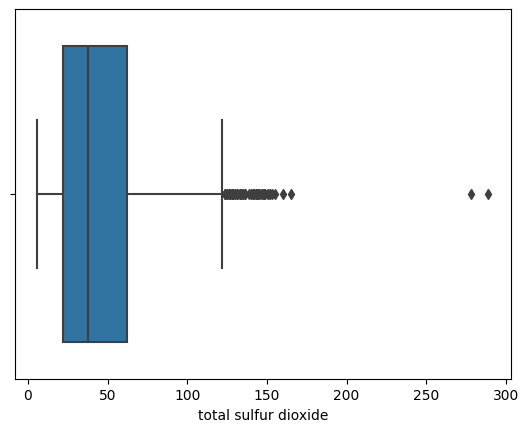

In [ ]:
# Boxplot Dioxido de Enxofre Total
sns.boxplot(x= Qldvinhos['total sulfur dioxide']);

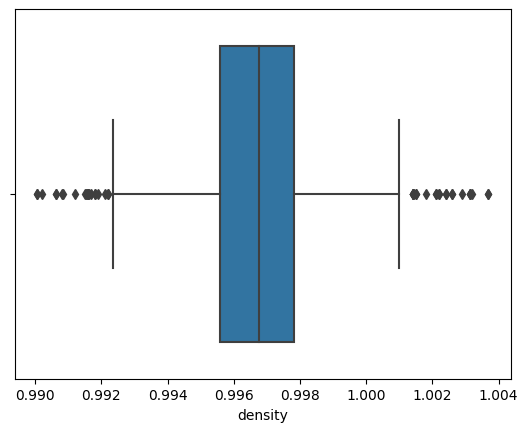

In [ ]:
# Boxplot Densidade
sns.boxplot(x= Qldvinhos['density']);

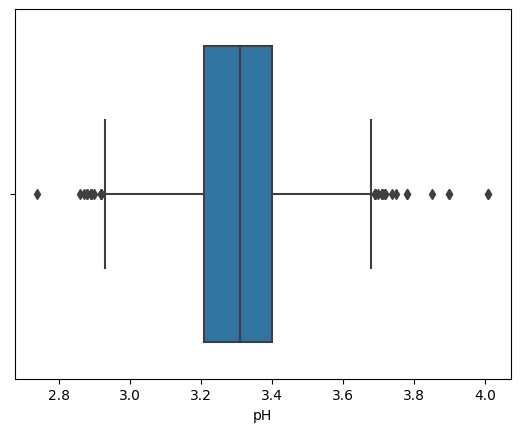

In [ ]:
# Boxplot pH
sns.boxplot(x= Qldvinhos['pH']);

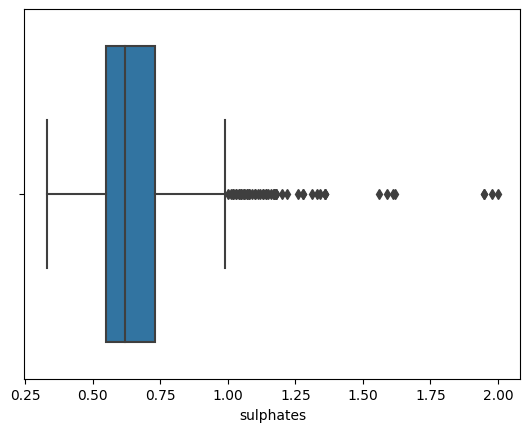

In [ ]:
# Boxplot Sulfato
sns.boxplot(x= Qldvinhos['sulphates']);

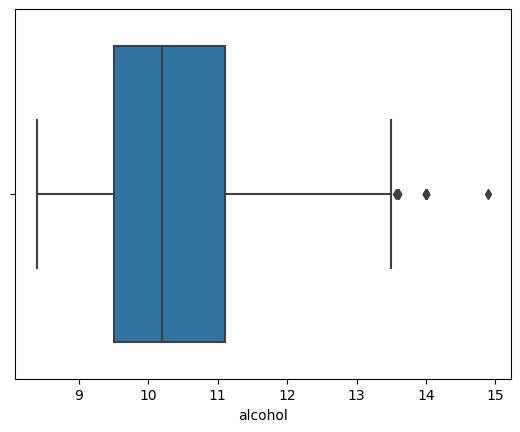

In [ ]:
# Boxplot Alcool
sns.boxplot(x= Qldvinhos['alcohol']);

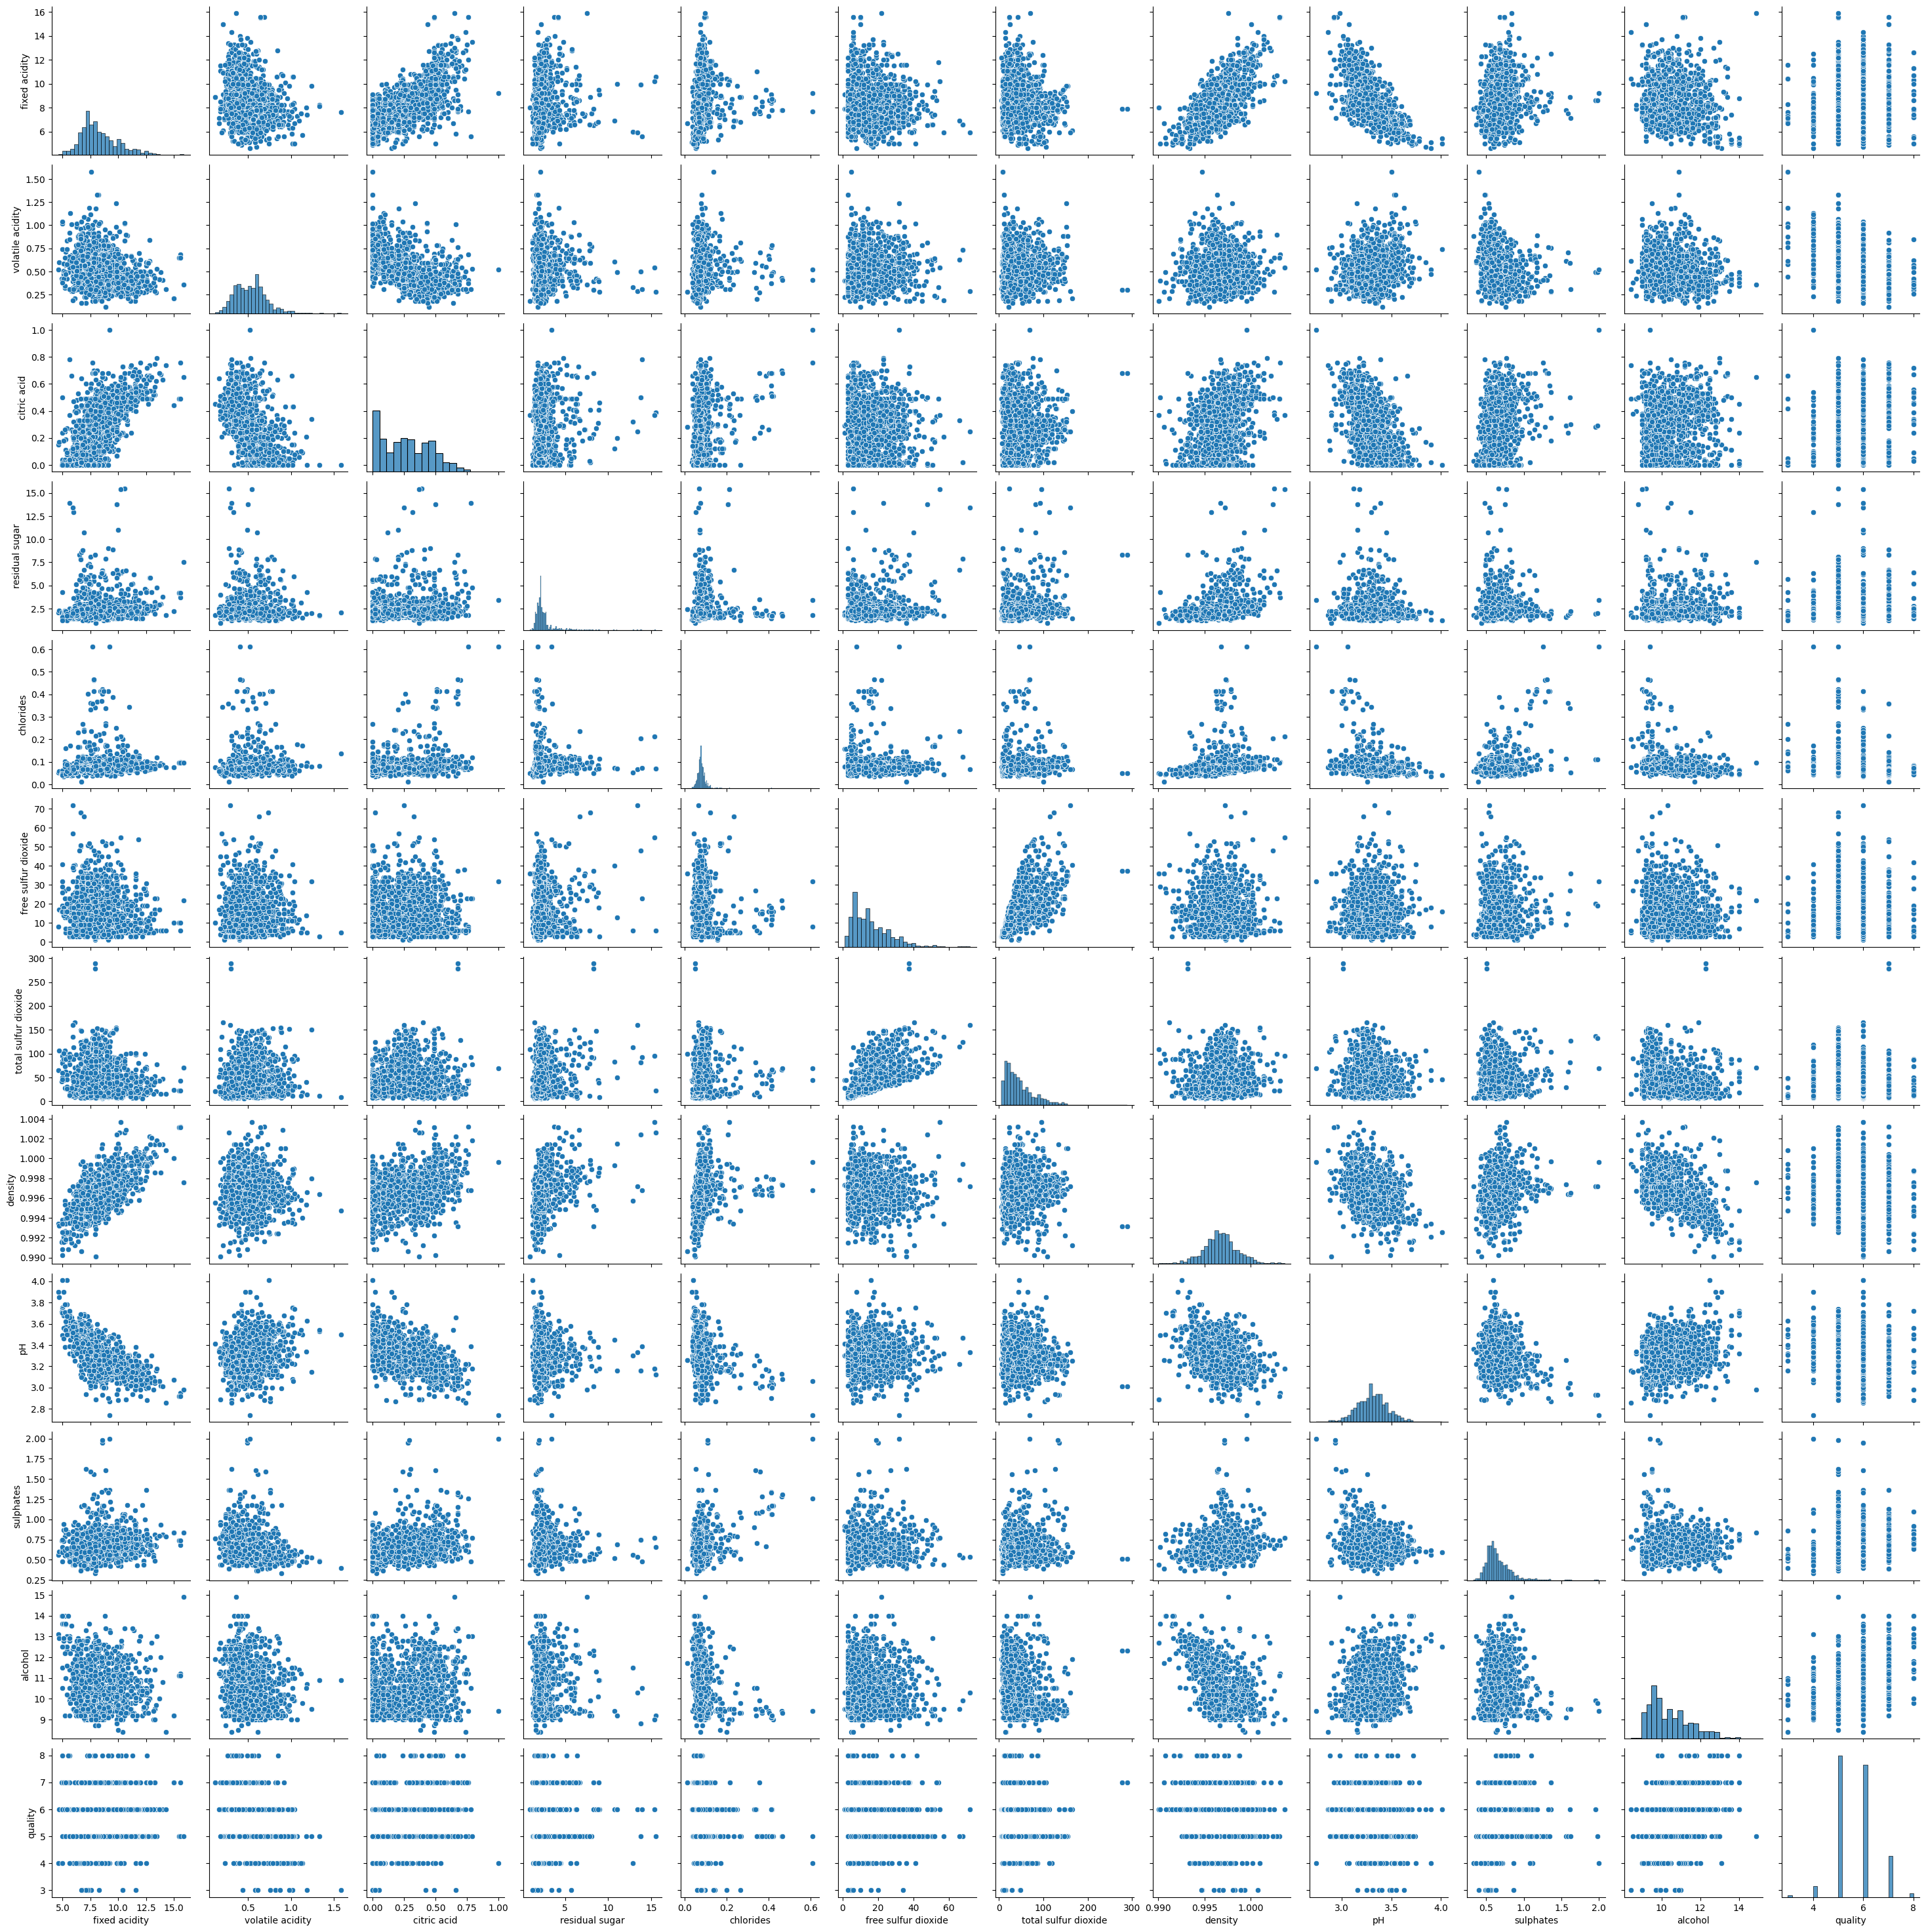

In [ ]:
sns.pairplot(Qldvinhos);

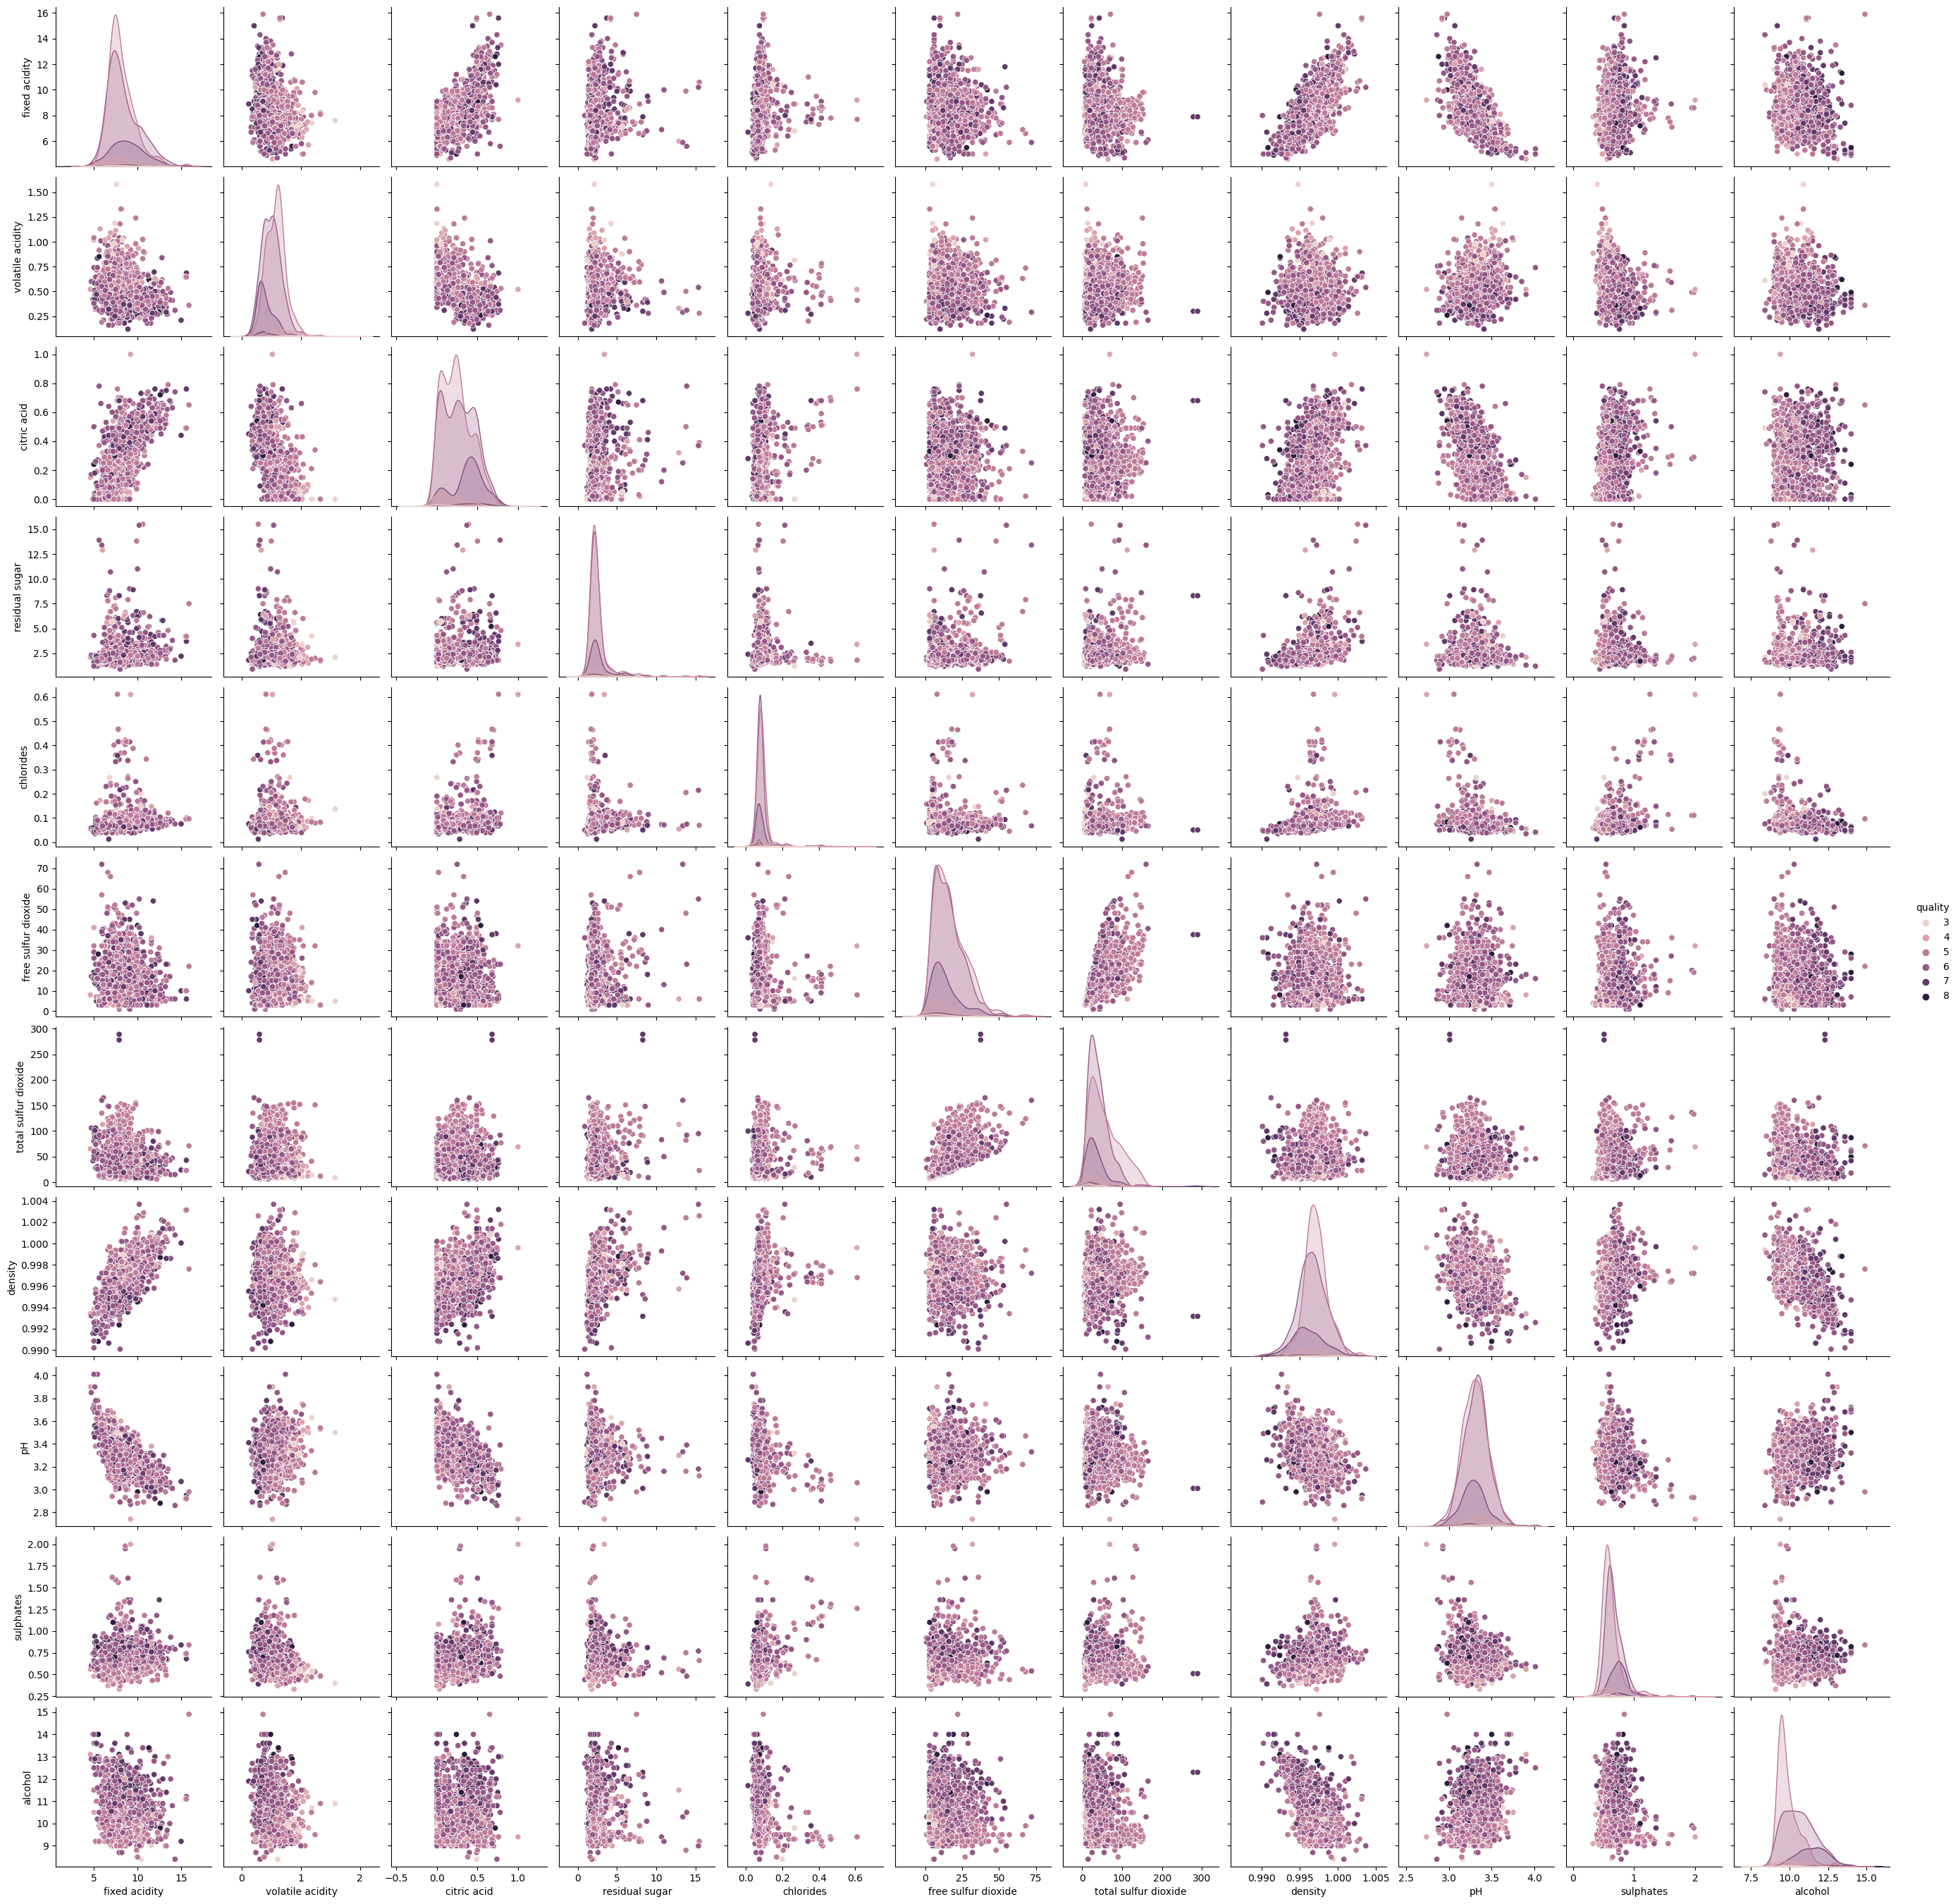

In [ ]:
sns.pairplot(Qldvinhos, hue = "quality")